In [1]:
!gdown 1J1eghnm5bPJTFcBUwTDHZhOP19YGpD6D

Downloading...
From: https://drive.google.com/uc?id=1J1eghnm5bPJTFcBUwTDHZhOP19YGpD6D
To: /content/used_cars.csv
100% 608k/608k [00:00<00:00, 13.2MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
df = pd.read_csv('used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
df.loc[0, 'price']

'$10,300'

In [6]:
# Chuyển đổi cột 'price' về int
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(int)

In [7]:
df['price']

,price
0,10300
1,38005
2,54598
3,15500
4,34999
...,...
4004,349950
4005,53900
4006,90998
4007,62999


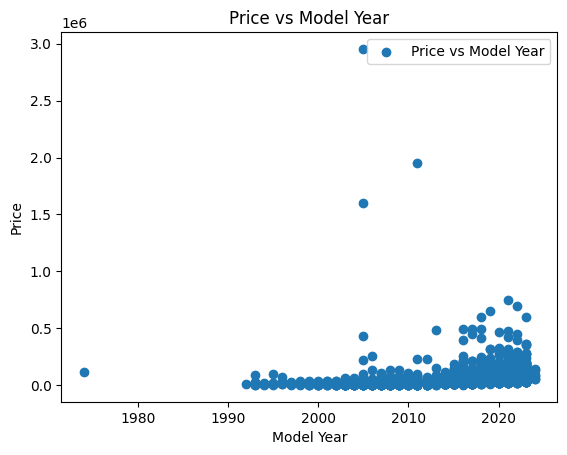

In [8]:
plt.scatter(df['model_year'], df['price'], label='Price vs Model Year')
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['model_year']], df['price'], test_size=0.2, random_state=42)

In [10]:
trainExample = list(zip(X_train['model_year'].values, y_train.values))

In [11]:
# Linear Regression implementation

def phi(x):
    return np.array([x, 1])  # Feature vector [x, 1]

def initialWeightVector():
    return np.zeros(2)  # w = [0, 0]

def trainloss(w):
    return (1.0 / len(trainExample)) * sum((w.dot(phi(x_i)) - y_i)**2 for x_i, y_i in trainExample)

def gradientTrainloss(w):
    return (1.0 / len(trainExample)) * sum(2 * (w.dot(phi(x_i)) - y_i) * phi(x_i) for x_i, y_i in trainExample)

def gradientDescent(L, gradientL, initialWeightVector, eta=0.01, max_iters=1000, step=10,
                    patience=20, tol=1e-5):
    w = initialWeightVector()
    history = []  # Store loss for plotting
    best_loss = float('inf')
    no_improve_count = 0

    for i in range(max_iters):
        value = L(w)
        gradient = gradientL(w)
        w_new = w - eta * gradient
        history.append(value)

        # Check early stopping condition
        if best_loss - value > tol:
            best_loss = value
            no_improve_count = 0
        else:
            no_improve_count += 1

        if i % step == 0:
            grad_norm = np.linalg.norm(gradient)
            print(f"Epoch {i}: Weight Vector = {w}, TrainLoss = {value:.6f}, Gradient Norm = {grad_norm:.6f}")

        if no_improve_count >= patience:
            print(f"\n⏹ Early stopping tại epoch {i} (TrainLoss không cải thiện trong {patience} lần liên tiếp).")
            break

        w = w_new

    return w, history


In [12]:
eta = 0.01
w, loss_history = gradientDescent(trainloss, gradientTrainloss, initialWeightVector, eta=eta)

Epoch 0: Weight Vector = [0. 0.], TrainLoss = 4480915805.871531, Gradient Norm = 174063108.338747
Epoch 10: Weight Vector = [-2.68580169e+50 -1.33252323e+47], TrainLoss = 293050536431944253867501032682825056654282275967451174156625005811192628160530380444003833167404040965849088.000000, Gradient Norm = 2182219941127686440662544876378627220124345647752598781952.000000
Epoch 20: Weight Vector = [-3.36717531e+99 -1.67057729e+96], TrainLoss = 46060228848182187259650466630974532961438030108031097910164198990545906269317954602972533448726216808217923848493302481306337924191925364621514324661644581155591113616150287099652110226498705402057283600384.000000, Gradient Norm = 27358375458795267646498746449912649419439744613291913623745533431264504107049440802482583993156603534639104.000000

⏹ Early stopping tại epoch 20 (TrainLoss không cải thiện trong 20 lần liên tiếp).


In [13]:
# Chuẩn hóa input (model_year)
x_mean = X_train['model_year'].mean()
x_std = X_train['model_year'].std()
X_train_norm = (X_train['model_year'] - x_mean) / x_std
X_test_norm = (X_test['model_year'] - x_mean) / x_std

# Chuẩn hóa output (price)
y_mean = y_train.mean()
y_std = y_train.std()
y_train_norm = (y_train - y_mean) / y_std

In [14]:
trainExample = list(zip(X_train_norm.values, y_train_norm.values))

In [15]:
eta = 0.01
w, loss_history = gradientDescent(trainloss, gradientTrainloss, initialWeightVector, eta=eta)

Epoch 0: Weight Vector = [0. 0.], TrainLoss = 0.999688, Gradient Norm = 0.706304
Epoch 10: Weight Vector = [ 6.46029067e-02 -6.79603967e-17], TrainLoss = 0.958231, Gradient Norm = 0.577139
Epoch 20: Weight Vector = [ 1.17391544e-01 -2.66103184e-16], TrainLoss = 0.930551, Gradient Norm = 0.471594
Epoch 30: Weight Vector = [ 1.60526449e-01 -5.44909023e-16], TrainLoss = 0.912068, Gradient Norm = 0.385351
Epoch 40: Weight Vector = [ 1.95773050e-01 -8.65671045e-16], TrainLoss = 0.899728, Gradient Norm = 0.314880
Epoch 50: Weight Vector = [ 2.24573922e-01 -1.20533732e-15], TrainLoss = 0.891488, Gradient Norm = 0.257296
Epoch 60: Weight Vector = [ 2.48107829e-01 -1.54720431e-15], TrainLoss = 0.885987, Gradient Norm = 0.210243
Epoch 70: Weight Vector = [ 2.67337967e-01 -1.87816225e-15], TrainLoss = 0.882314, Gradient Norm = 0.171795
Epoch 80: Weight Vector = [ 2.83051391e-01 -2.18944981e-15], TrainLoss = 0.879861, Gradient Norm = 0.140378
Epoch 90: Weight Vector = [ 2.95891219e-01 -2.47828989e

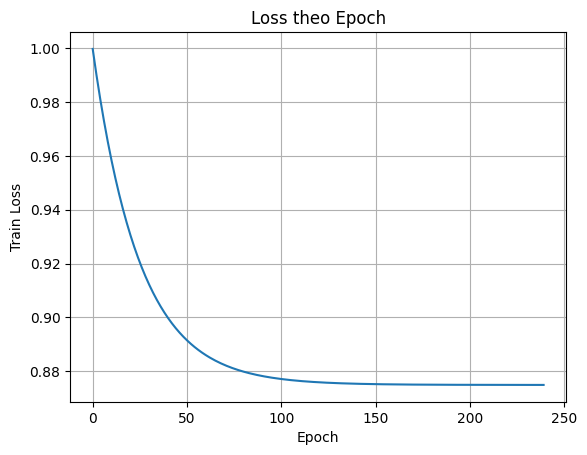

In [16]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Loss theo Epoch')
plt.grid(True)
plt.show()

In [17]:
def predict(model_year):
    x_norm = (model_year - x_mean) / x_std  # chuẩn hóa input
    y_pred_norm = w.dot(phi(x_norm))        # dự đoán trên input chuẩn hóa
    y_pred = y_pred_norm * y_std + y_mean   # scale ngược lại về đơn vị gốc
    return y_pred

In [18]:
model_years = [2005, 2010, 2015, 2020, 2025]
for year in model_years:
    predicted_price = predict(year)
    print(f"Năm {year} → Dự đoán giá: ${predicted_price:.2f}")

Năm 2005 → Dự đoán giá: $11721.56
Năm 2010 → Dự đoán giá: $26594.01
Năm 2015 → Dự đoán giá: $41466.46
Năm 2020 → Dự đoán giá: $56338.91
Năm 2025 → Dự đoán giá: $71211.37


In [19]:
# Trích xuất trọng số từ w
w0, w1 = w[1], w[0] # Trong đó w0 là hệ số của model_year đã normalize, w1 là bias

# In ra trọng số đã học được
print("Trọng số đã học được (weights): w0 =", w0, ", w1 =", w1)

Trọng số đã học được (weights): w0 = -4.395758261078592e-15 , w1 = 0.3504322466179235


In [20]:
# Dự đoán giá trị price cho tất cả các model_year trong tập test
y_pred_test = np.array([predict(x) for x in X_test['model_year']])

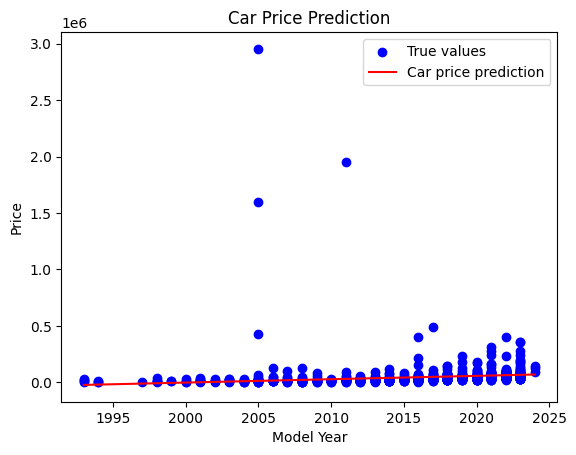

In [21]:
# Vẽ biểu đồ phân tán của model_year và price trong tập test
plt.scatter(X_test['model_year'], y_test, color='blue', label='True values')

# Sắp xếp lại model_year để vẽ đường hồi quy tuyến tính mượt mà
sorted_indices = np.argsort(X_test['model_year'])  # Lấy chỉ số của các giá trị model_year theo thứ tự tăng dần
sorted_model_year = X_test['model_year'].iloc[sorted_indices]
sorted_y_pred_test = y_pred_test[sorted_indices]

# Vẽ đường hồi quy tuyến tính
plt.plot(sorted_model_year, sorted_y_pred_test, color='red', label='Car price prediction')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Car Price Prediction')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.legend()

# Hiển thị biểu đồ
plt.show()